# Librerias

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline


# Análisis del DataSet

El siguiente análisis tiene como finalidad examinar un DataSet que contiene
datos reales sobre pacientes que han ingresado al área de emergencias de distintos hospitales de EEUU. El conjunto de datos seleccionado contiene información clave, como el nombre del paciente, edad, genero, tipo de sangre, motivo del ingreso, fecha de admisión, medico tratante, hospital de atención, cobertura de seguro médico, monto de facturación, en cual habitación estuvo internado, fecha de alta, que mediación recibió y los resultados de sus respectivos exámenes. Todas estas variables permitirán realizar un análisis descriptivo y comparativo, útiles para apoyar a la toma de decisiones en el ámbito de la salud.
Entre los objetivos del análisis se pueden encontrar:


1.   Identificar la cantidad de pacientes hombres y de mujeres.
2.   Determinar cuáles son las causas más frecuentes de ingresos a hospitales.
3.   Comparar que hospital tiene más afluencia de pacientes.
4.   Evaluar cual es la media de pacientes por edad.
5.   Conocer que medicamentos son más utilizados.
6.   Comparar la cantidad de adultos con respecto a la cantidad de niños ingresados.

Para alcanzar estos objetivos, se implementarán técnicas de limpieza de datos, visualización de gráfica, estudio de las variables mediante fórmulas y métodos, con el fin de llegar a conclusiones que determinen futuras acciones para mejoras al sistema de salud.

Columnas del DataSet:
1. Name (Nombre) tipo Texto
2. Age (Edad) tipo Numérico
3. Gender (Género) tipo Categórico
4. Blood Type (Tipo de Sangre) tipo Categórico
5. Medical Condition (Condición médica a la entrada a urgencias) tipo Categórico
6. Date of Admission (Fecha de Admisión) tipo Fecha
7. Doctor (Nombre del doctor a cargo del paciente) tipo Texto
8. Hospital (Nombre del hospital de atención) tipo Categórico
9. Insurance Provider (Seguro médico) tipo Categórico
10. Billing Amount (Monto de Facturación) tipo Numérico
11. Room Number (Número de Habitación) tipo Numérico
12. Admission Type (Tipo de admisión) tipo Categórico
13. Discharge Date (Fecha de alta) tipo Fecha
14. Medication (Medicación) tipo Categórico
15. Test Results (Resultado de la evaluación) tipo Categórico

# Importar DataSet

In [4]:
url = "https://drive.google.com/uc?id=1jtVHR0pK80L_RbWZ3bIepYFQg7vyGnnm"
healthcare = pd.read_csv(url)


# Obtención básica de los Datos

Para conocer la cantidad de pacientes aplicamos el siguiente método

In [5]:
healthcare.shape

(55500, 15)

In [6]:
healthcare.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [7]:
healthcare.tail()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal
55499,jAMES GARCiA,53,Female,O+,Arthritis,2024-04-02,Dennis Warren,Henry Sons and,Aetna,4010.134172,448,Urgent,2024-04-29,Ibuprofen,Abnormal


Debemos saber si en el DataSet existen datos nulos

In [8]:
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

# Corrección de Datos

Dado que en este caso no existen datos nulos, se debe corregir la forma en están escritos los nombres para que su visualización sea la correcta

In [9]:
healthcare['Name'] = healthcare['Name'] .str.capitalize()

In [10]:
healthcare.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [11]:
healthcare.tail()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
55495,Elizabeth jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,Kyle perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,Heather wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,Jennifer jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal
55499,James garcia,53,Female,O+,Arthritis,2024-04-02,Dennis Warren,Henry Sons and,Aetna,4010.134172,448,Urgent,2024-04-29,Ibuprofen,Abnormal


# Contabilización de los datos

Ahora necesitamos conocer las condiciones medicas más frecuentes.

In [12]:
diseases=healthcare['Medical Condition'].value_counts()
diseases

,count
Medical Condition,
Arthritis,9308
Diabetes,9304
Hypertension,9245
Obesity,9231
Cancer,9227
Asthma,9185


<Axes: ylabel='Medical Condition'>

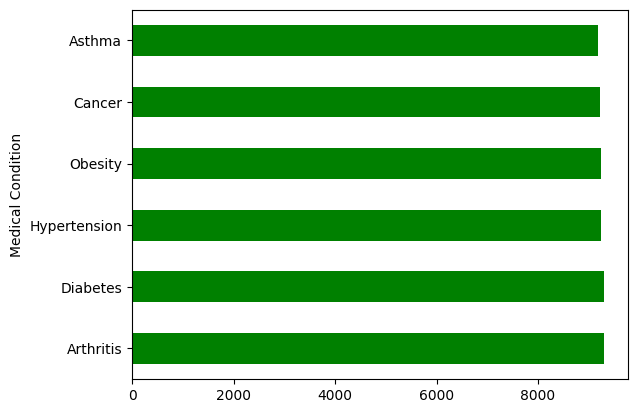

In [13]:
healthcare['Medical Condition'].value_counts().head(10).plot(kind='barh', color='green')

Ya que tienen cantidades de pacientes por enfermedades parecidos en números el gráfico se aprecia de ésta manera.

Para conocer la media, la mediana, la edad mínima y la edad máxima con respecto a la edad implementamos el siguiente método

In [14]:
healthcare['Age'].describe()

,Age
count,55500.000000
mean,51.539459
std,19.602454
min,13.000000
25%,35.000000
50%,52.000000
75%,68.000000
max,89.000000


Con el siguiente método conocemos la cantidad de hombres y la cantidad de mujeres evaluados

In [15]:
healthcare['Gender'].value_counts()

,count
Gender,
Male,27774
Female,27726


<Axes: ylabel='count'>

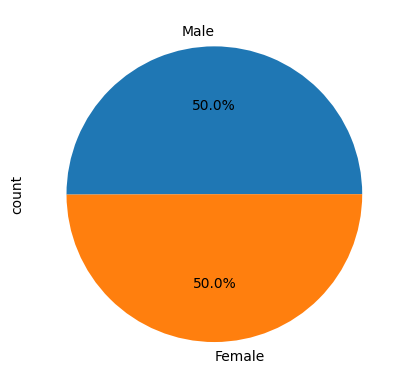

In [16]:
healthcare['Gender'].value_counts().plot.pie(autopct='%1.1f%%')

En la columna 'Admision Type' podemos ver el tipo de admisión que se le dió al paciente. Están descritos 3 tipos:

1.   Elective
2.   Urgent
3.   Emergency

In [17]:
healthcare['Admission Type'].value_counts()

,count
Admission Type,
Elective,18655
Urgent,18576
Emergency,18269


Cantidad de pacientes por tipos de sangre.

In [18]:
healthcare['Blood Type'].value_counts()

,count
Blood Type,
A-,6969
A+,6956
AB+,6947
AB-,6945
B+,6945
B-,6944
O+,6917
O-,6877


Con el siguiente método podemos identificar cual es la cobertura de seguro más utilizada

In [19]:
healthcare['Insurance Provider'].value_counts()

,count
Insurance Provider,
Cigna,11249
Medicare,11154
UnitedHealthcare,11125
Blue Cross,11059
Aetna,10913


Para conocer la cantidad de mediamentos utilizados por pacientes, se emplea el siguiente método. Es muy valioso este dato, ya que debemos conocer la cantidad de medicamentos y variedad para que los hospitales nunca se queden sin stock

In [20]:
healthcare['Medication'].value_counts()

,count
Medication,
Lipitor,11140
Ibuprofen,11127
Aspirin,11094
Paracetamol,11071
Penicillin,11068


In [21]:
healthcare['Doctor'].value_counts()

,count
Doctor,
Michael Smith,27
John Smith,22
Robert Smith,22
Michael Johnson,20
James Smith,20
...,...
Keith Ortiz,1
Timothy Chapman,1
Terri Collins,1


# Rango de fechas

Para saber el rango de fechas utilizadas en el dataset aplicamos lo siguiente

In [22]:
ultimafecha = healthcare['Date of Admission'].min()
primerafecha = healthcare['Date of Admission'].max()
print("El Rango de fechas del Dataset es desde :", primerafecha)
print("El Rango de fechas del Dataset es hasta :", ultimafecha)

El Rango de fechas del Dataset es desde : 2024-05-07
El Rango de fechas del Dataset es hasta : 2019-05-08


# Gráfico: Cantidad de pacientes por edad

El siguiente grafico se muestra la cantidad de pacientes por edad.

<Axes: xlabel='Age', ylabel='Count'>

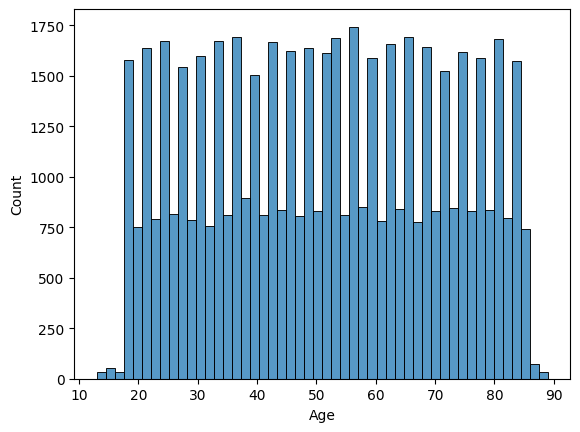

In [23]:
sns.histplot(healthcare['Age'], bins=50)

# Gráfico: Comprar la cantidad de adultos asistentes a la guardia con respecto a la cantidad de niños

Para hacer la comparativa de cuantos adultos asisten a la emergencia con respecto a los niños, aplicamos los siguientes métodos

In [24]:
pacientesmayores = healthcare[healthcare['Age'] > 18].shape[0]
pacientesmayores

54612

In [25]:
pacientesmenores = healthcare[healthcare['Age'] <= 18].shape[0]
pacientesmenores

888

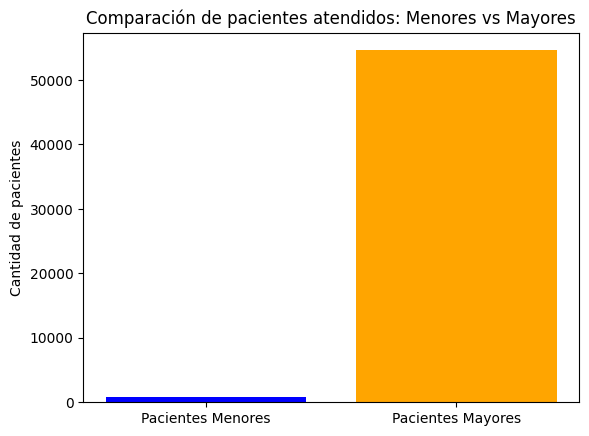

In [26]:
categorias = ['Pacientes Menores', 'Pacientes Mayores']
cantidades = [pacientesmenores, pacientesmayores]
plt.bar(categorias, cantidades, color=['blue', 'orange'])
plt.title('Comparación de pacientes atendidos: Menores vs Mayores')
plt.ylabel('Cantidad de pacientes')
plt.show()

Analizando el gráfico se puede afirmar que hay más pacientes adultos que niños asistiendo a la guardia.

# Gráfico: Doctores con más cantidad de pacientes vistos

<Axes: xlabel='Doctor'>

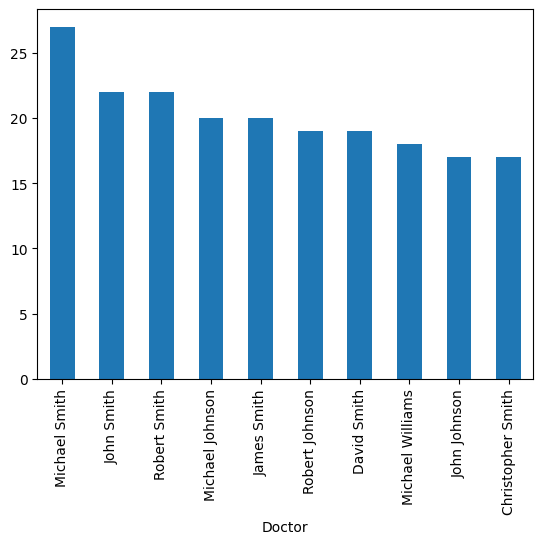

In [27]:
healthcare['Doctor'].value_counts().head(10).plot(kind='bar')

Se muestra en el grafico el top 10 de los doctores con más pacientes atendidos.

In [28]:
healthcare.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


# Gráfico: Enfermedades que afectan a los pacientes teniendo en cuenta el sexo

A continuación se podrán visualizar que enfermedades efectan más a los pacientes tomando en cuenta su sexo.

In [29]:
df = healthcare[['Gender', 'Medical Condition']]
print(df)

       Gender Medical Condition
0        Male            Cancer
1        Male           Obesity
2      Female           Obesity
3      Female          Diabetes
4      Female            Cancer
...       ...               ...
55495  Female            Asthma
55496  Female           Obesity
55497  Female      Hypertension
55498    Male         Arthritis
55499  Female         Arthritis

[55500 rows x 2 columns]


Tomamos del Dataset original los datos necesarios para hacer los calculos en porcentaje convirtiendolos en un DataFrame nuevo llamado df

Ahora para poder contabilizar los datos se tranforman en una secuencia de números enteros utilizando el método LebelEncoder de sklearn

In [30]:
label_encoders = {}
for col in ['Gender', 'Medical Condition']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print(df)

       Gender  Medical Condition
0           1                  2
1           1                  5
2           0                  5
3           0                  3
4           0                  2
...       ...                ...
55495       0                  1
55496       0                  5
55497       0                  4
55498       1                  0
55499       0                  0

[55500 rows x 2 columns]


<ipython-input-30-347cc3ec8179>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-30-347cc3ec8179>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])


Se vizualizan de la siguiente manera, para Male: 1, para Female: 0 y así también se aplica para las enfermedades, el for recorrerá todo el DataSet para hacer la secuencia de Diabetes 1 en cada posición de Diabetes lo tranformará en 1, y así hara con los demás valores respectivamente

In [31]:
gender_labels = label_encoders['Gender'].classes_
condition_labels = label_encoders['Medical Condition'].classes_
print(condition_labels)
print(gender_labels)

['Arthritis' 'Asthma' 'Cancer' 'Diabetes' 'Hypertension' 'Obesity']
['Female' 'Male']


Guardamos lo valores originales de los datos unificados en los arrays gender_labels y condition_labels

In [32]:
condition_by_gender = df.groupby(['Medical Condition', 'Gender']).size().unstack(fill_value=0)
print(condition_by_gender)

Gender                0     1
Medical Condition            
0                  4686  4622
1                  4553  4632
2                  4602  4625
3                  4651  4653
4                  4612  4633
5                  4622  4609


Ahora agrupamos en un nuevo DataFrame (condition_by_gender) Medical Condition y Gender
y utilizamos el .unstack() para convertir los Datos de Gender en columnas respecto a los datos registrados, en este caso sería Female y Male


In [33]:
condition_by_gender_percent = condition_by_gender.div(condition_by_gender.sum(axis=1), axis=0) * 100
condition_by_gender_percent.index = [condition_labels[i] for i in condition_by_gender_percent.index]
condition_by_gender_percent.columns = [gender_labels[i] for i in condition_by_gender_percent.columns]

Preprando los datos necesarios para el gráfico, se calculan los porcentajes de lo valores, luego se reemplaza los números de las filas y columnas que eran números enteros por los valores iniciales

In [34]:
annot_text = condition_by_gender_percent.copy()
for row in annot_text.index:
    for col in annot_text.columns:
        percent = annot_text.loc[row, col]
        annot_text.loc[row, col] = f"{percent:.1f}%\n{col}"

<ipython-input-34-8aaccb770d34>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '50.3%
Female' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annot_text.loc[row, col] = f"{percent:.1f}%\n{col}"
<ipython-input-34-8aaccb770d34>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '49.7%
Male' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annot_text.loc[row, col] = f"{percent:.1f}%\n{col}"


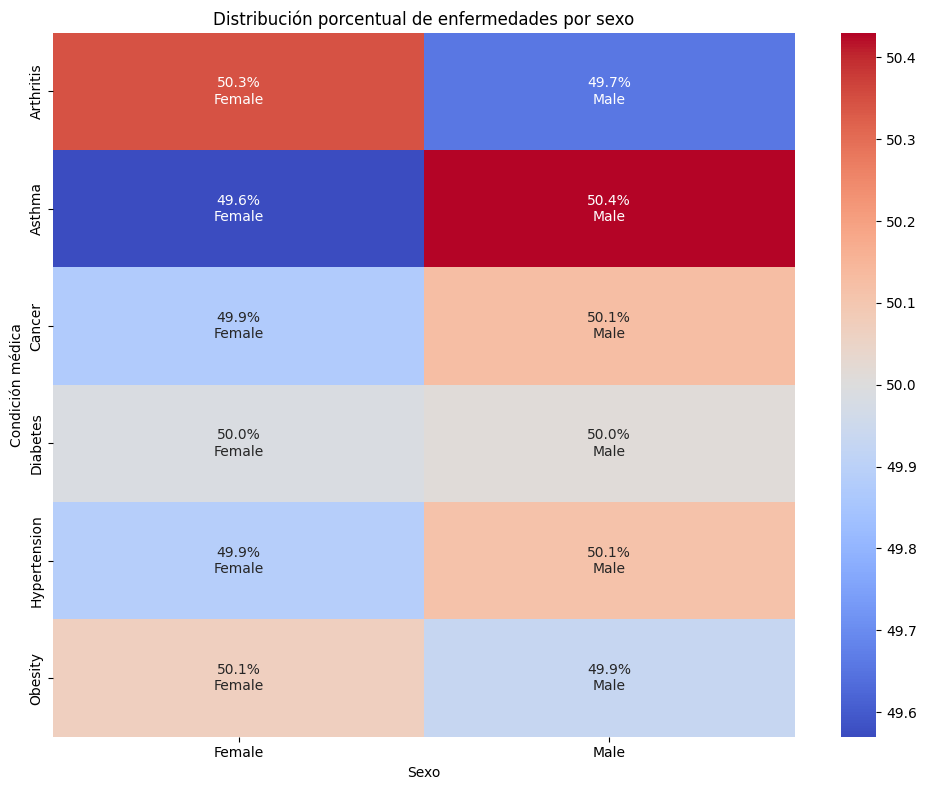

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    condition_by_gender_percent.astype(float),
    annot=annot_text.values,
    fmt='',
    cmap="coolwarm",
    annot_kws={"size": 10}
)
plt.title("Distribución porcentual de enfermedades por sexo")
plt.ylabel("Condición médica")
plt.xlabel("Sexo")
plt.tight_layout()
plt.show()

# Featuring Selection

Para este Dataset elegí el método de clasificación utilizando como objetivo 'Medical Condition', motivado a que cuenta con 6 clases equilibradas y cuenta con otras variables que influyen directamente en ella cómo lo es 'Test Result'.

In [36]:
print(diseases)

Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64


Eliminamos las columnas que no son relevantes

In [37]:
columnasaeliminar = ['Name', 'Doctor', 'Room Number', 'Date of Admission', 'Discharge Date']
df_cleaned = healthcare.drop(columns=columnasaeliminar)
df_cleaned.columns

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Hospital',
       'Insurance Provider', 'Billing Amount', 'Admission Type', 'Medication',
       'Test Results'],
      dtype='object')

Tenemos que asegurarnos que la variable objetivo no se incluye en en las variables de entrada, par apoder utilizarla como target

In [38]:
X = df_cleaned.drop(columns=['Medical Condition'])
y = df_cleaned['Medical Condition']

Aplicamos para las columnas de text LabelEncoder para volver categoricas las columnas de texto como 'Gender', 'Hospital', etc

In [39]:
X_encoded = X.copy()
label_encoders = {}
for col in X_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    label_encoders[col] = le

In [40]:
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X_encoded)

Dividir los datos para entrenar y evaluar el modelo

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

Entrenamos el modelo

In [42]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluamos el modelo con métricas estándar

In [43]:
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=False)
print(report)

              precision    recall  f1-score   support

   Arthritis       0.28      0.28      0.28      1915
      Asthma       0.29      0.29      0.29      1847
      Cancer       0.30      0.29      0.29      1871
    Diabetes       0.28      0.29      0.29      1822
Hypertension       0.30      0.30      0.30      1788
     Obesity       0.32      0.31      0.32      1857

    accuracy                           0.29     11100
   macro avg       0.30      0.29      0.29     11100
weighted avg       0.29      0.29      0.29     11100



Graficar

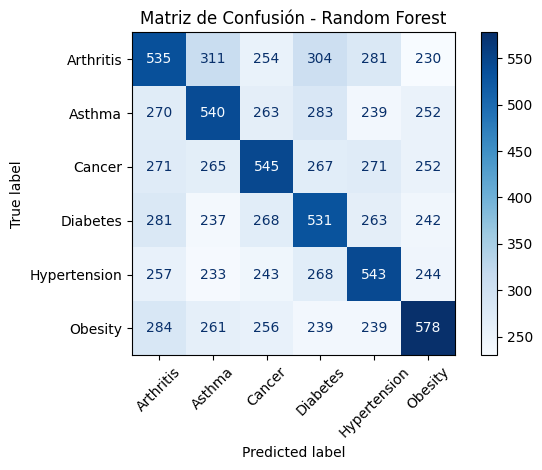

In [44]:
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Matriz de Confusión - Random Forest")
plt.tight_layout()
plt.show()

# Análisis final

Luego de analizar el siguiente dataset basado entre un rango de fechas desde 08 de mayo del 2019 hasta el 07 de mayo del 2024, podemos concluir que se admitieron 55500 pacientes, de los cuales 54612 estaban en un rango de edad de los 19 años hasta los 89 y solo 888 pacientes eran menores de edad. Las enfermedades tratadas fueron artritis, diabetes, hipertensión, obesidad, cancer y asma.

El dataset nos dio información muy completa donde se puede observar desde los hospitales donde fueron atendidos los pacientes hasta los médicos que estuvieron a cargo del cuidado, se pudieron analizar a lo largo de todo el trabajo varios aspectos, entre los cuales se pueden mencionar:

1. En la columna ‘Medical Condition’ podemos obtener un número muy parejo de pacientes por cada enfermedad reportada.
2. La media en edad sería 51 años, teniendo como paciente más joven a una persona de 13 años y la de mayor edad a una persona de 89 años. Sin embargo el porcentaje de adultos es de un 90% en comparación de los niños atendidos.
3. Es importante en este rubro conocer los medicamentos mas utilizados para que no exista deficit de stock, entre los más utilizados son Lipitor con un valor de 11140 e ibuprofeno 11127, luego pero no menos importante tenemos Aspirin, paracetamol y penicillin.
4. La cantidad de hombres atendidos es de 27774 y de mujeres es de 27726.
5. Realizamos una distribución porcentual de los pacientes con respecto a las enfermedades reportadas y se puede concluir en que la artritis le afecta en mayor porcentaje a las mujeres que a los hombres, a diferencia del cáncer y la hipertensión.

Al tener todo éste análisis se pueden tomar varias decisiones que ayuden a optimizar la atención para con el paciente y poder regularizar procedimientos.

A continuación podemos describir al modelo RandomForestClassifier como flexible, funciona sin mucho procesamiento, permite resultados fáciles de interpretar. Construye árboles de decisión a partir de diferentes muestras y toma su voto mayoritario para decidir la clasificación y el promedio en caso de regresión. Fue seleccionado para este análisis ya que los valores con que contábamos son ideales para un resultado óptimo como también la cantidad de datos con los que contabamos.

Luego de realizar la limpieza, codificación y tratamiento de datos faltantes, se entrenó y evaluó el modelo sobre seis clases médicas: Arthritis, Asthma, Cancer, Diabetes, Hypertension y Obesity.

La matriz de confusión es una tabla que compara las predicciones del modelo con las etiquetas reales, si el modelo es perfecto, todas las predicciones estarían en la diagonal principal de la matriz. Para este gráfico en específico podemos observar que la clase real y la clase predicha coindicen porque los valores altos en la diagonal del modelo aciertan.

En la diagonal principal es donde se puede apreciar el mayor numero, esto indica que el modelo acierta en el mayor de los casos, donde Obesity es el que tiene la mayor cantidad de predicciones correctas y aunque se pueden ver algunas diferencias en las predicciones tiene alrededor de 500 predicciones correctas por clases lo que indica que el modelo funciona bien y de manera equilibrada.

El modelo de Random Forest ha demostrado ser eficaz y confiable para esta tarea de clasificación médica. La matriz de confusión, respalda esta afirmación al mostrar un rendimiento estable y coherente. Este sistema puede ser una base útil para el desarrollo de herramientas de apoyo al diagnóstico clínico, siempre y cuando se complemente con la supervisión de profesionales de la salud y un análisis continuo de sus resultados.


